In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
%matplotlib inline
import itertools
from statsmodels.stats.multicomp import MultiComparison

In [109]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [282]:
import xgboost as xgb

In [4]:
sns.set(rc={'figure.figsize':(20,10)})

In [5]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

# Additional model for testing
model = pd.read_csv('mr.csv')
model.drop('Unnamed: 0', axis=1, inplace=True)

In [215]:
test_df = pd.read_csv('bank-additional-full.csv', sep=";")

### Data Clean-Up

In [6]:
education_dict = {'basic.4y':'4Y', 'basic.6y':'6Y', 'basic.9y':'9Y', 'high.school':'high school', 'professional.course': 'professional course', "university.degree":'university degree'}
df['education'] = df['education'].replace(education_dict)

In [7]:
y_dict = {'no': 0, 'yes': 1}
df = df.replace(y_dict)

In [8]:
default_replacer = {'unknown': -1, 'no':0, 'yes':1}
df['default'] = df['default'].replace(default_replacer)

In [9]:
df.drop(['duration','pdays'], axis=1,inplace=True)

In [67]:
## Hold off on this until I finish with graph.

# df['age_bin'] = pd.cut(df['age'],9, labels = ['10s','20s', '30s', '40s','50s','60s','70s','80s','90s'])
# df[['age', 'age_bin']]
# dums = pd.get_dummies(df['age_bin'])
# df.drop(columns=['age'], axis =1, inplace =True)
# df=df.join(dums)

In [10]:
jobs = df['job'].value_counts()

[Text(0, 0.5, 'Count of Jobs'), Text(0.5, 0, 'Type of Job')]

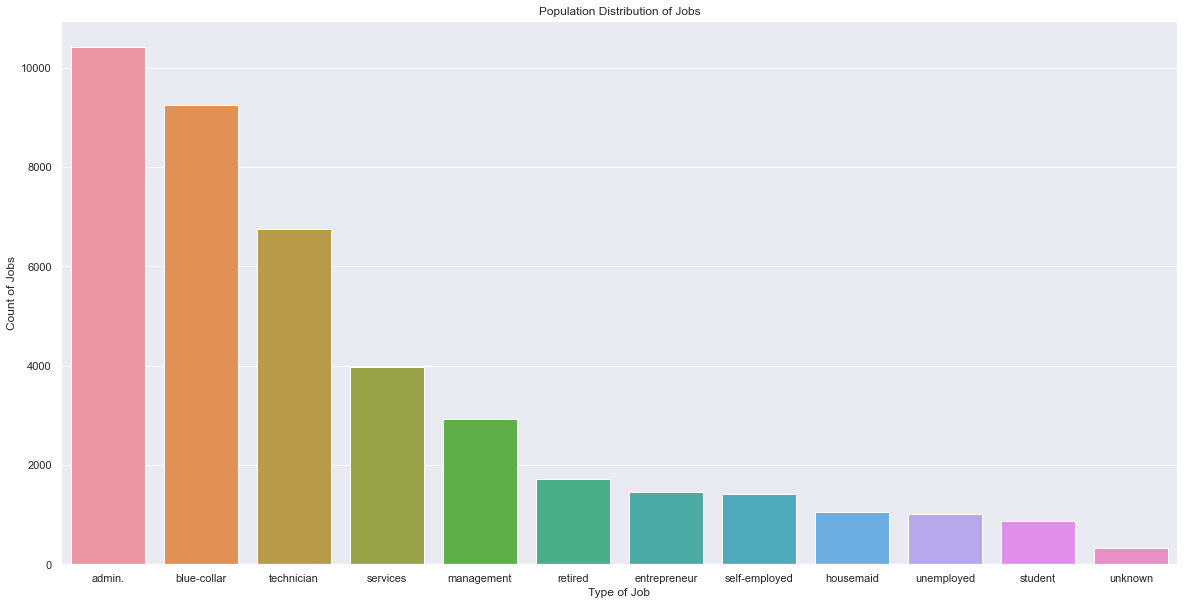

In [11]:
jobs_chart = sns.barplot(x=jobs.index, y=jobs.values)
jobs_chart.set_title('Population Distribution of Jobs')
jobs_chart.set(xlabel='Type of Job', ylabel='Count of Jobs')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


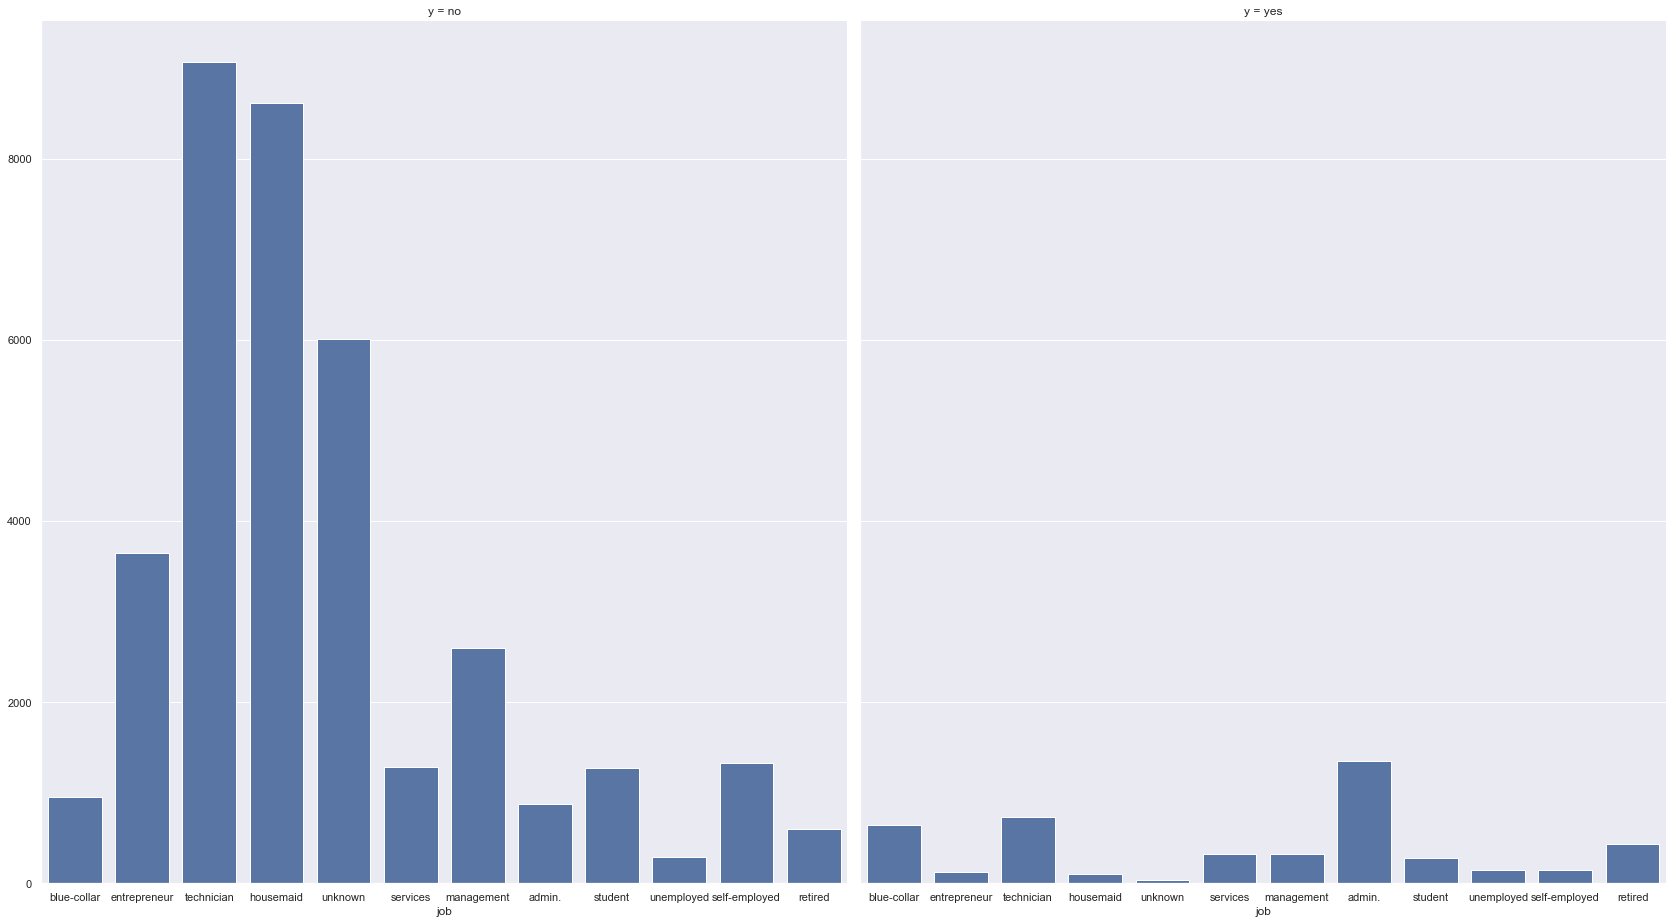

In [218]:
g = sns.FacetGrid(test_df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "job")

In [15]:
target_data = df['y'].value_counts()

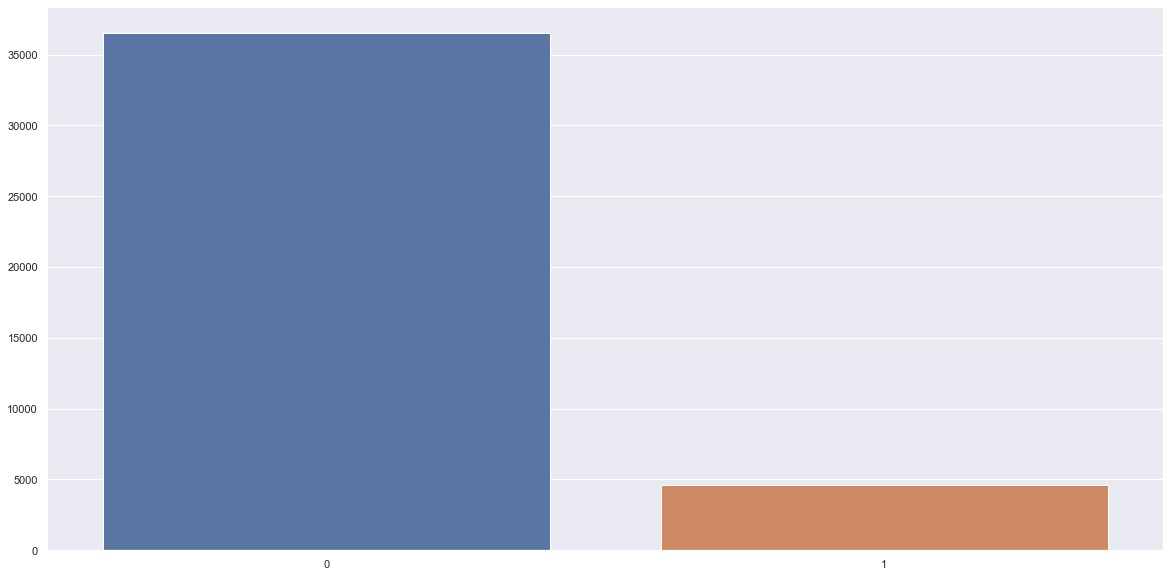

In [16]:
target_chart = sns.barplot(x=target_data.index, y=target_data.values)

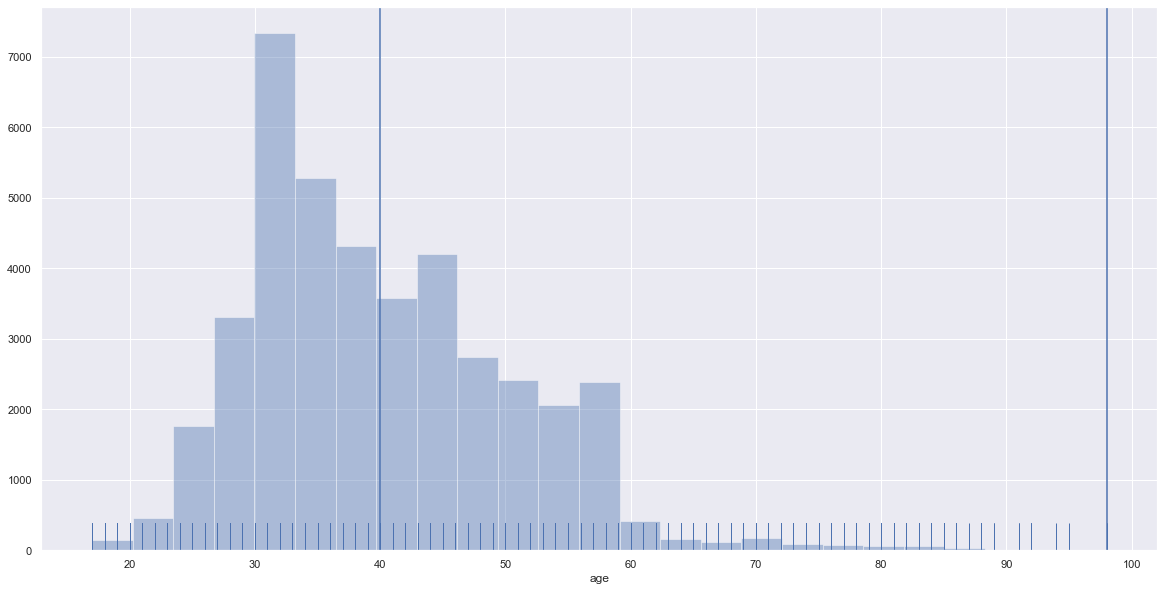

In [17]:
fig, ax = plt.subplots(sharex=True)
mean = df['age'].mean()
age_max = df['age'].max()

plt.axvline(mean)
plt.axvline(age_max)

sns.distplot(df['age'], rug=True, kde=False, bins=25)

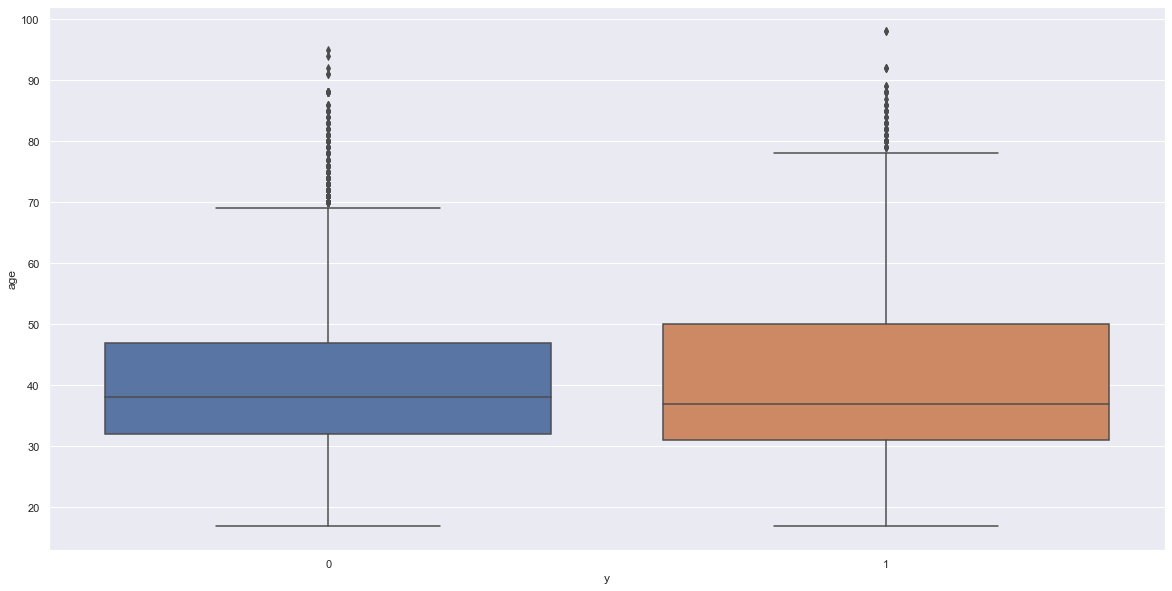

In [278]:
sns.boxplot(x=df['y'],y=df['age'])

In [188]:
print(df[df['y']==1]['cons.conf.idx'].mean())
print(df[df['y']==0]['cons.conf.idx'].mean())

-39.78978448275862
-40.59309674948014


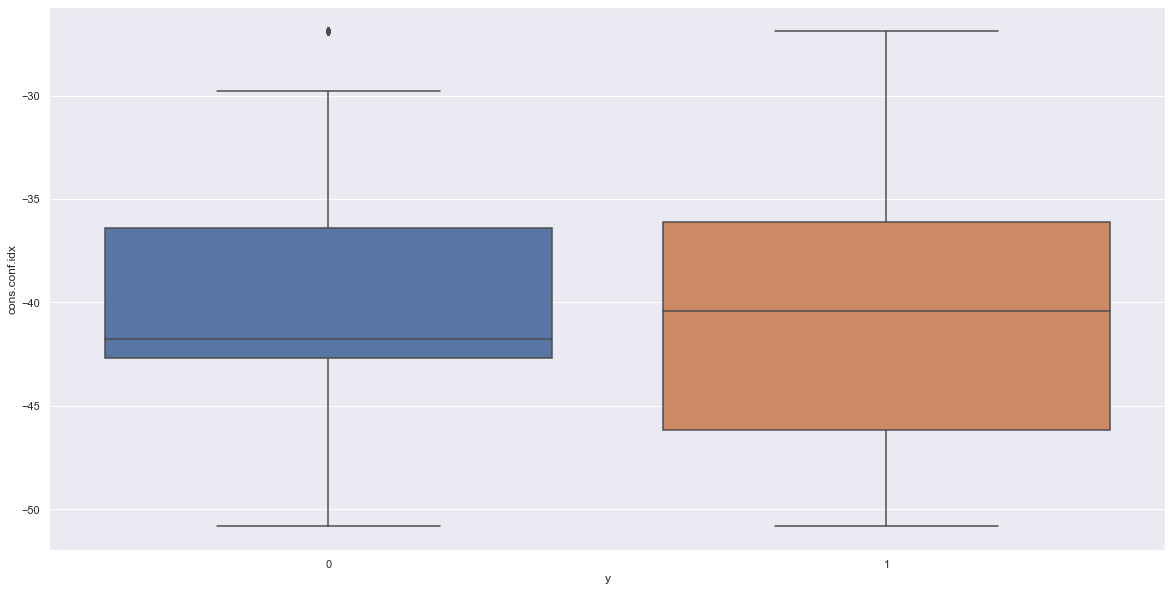

In [224]:
cons = sns.boxplot(x=df['y'],y=df['cons.conf.idx'])
plt.title('Consumer Confidence by Target')

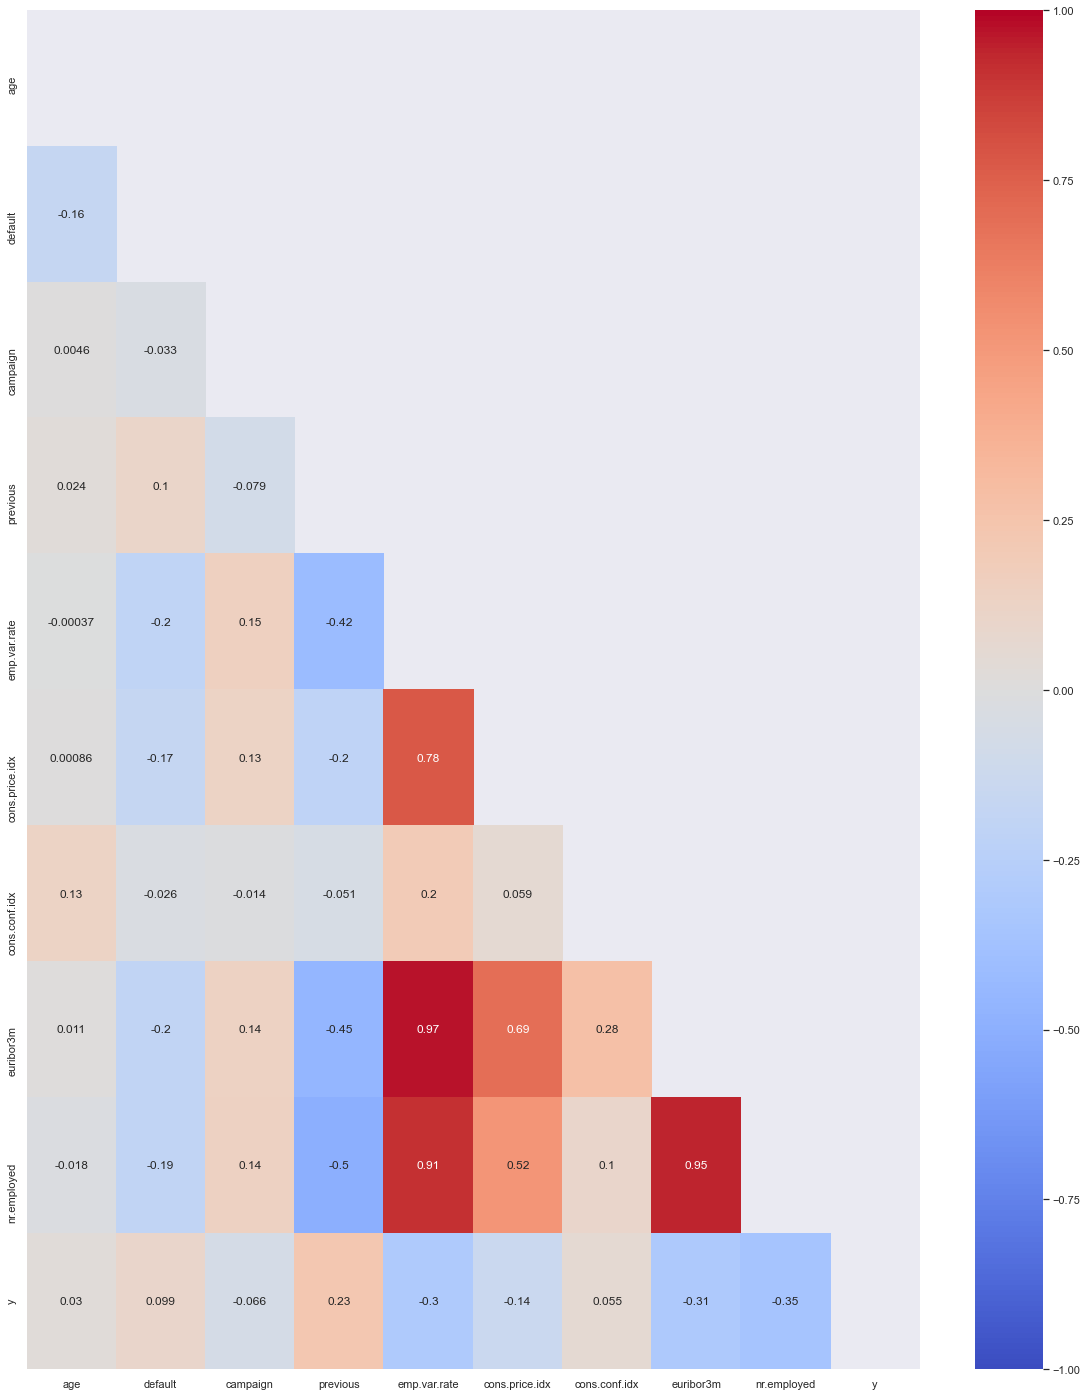

In [18]:
f, ax = plt.subplots(figsize=(20, 25))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

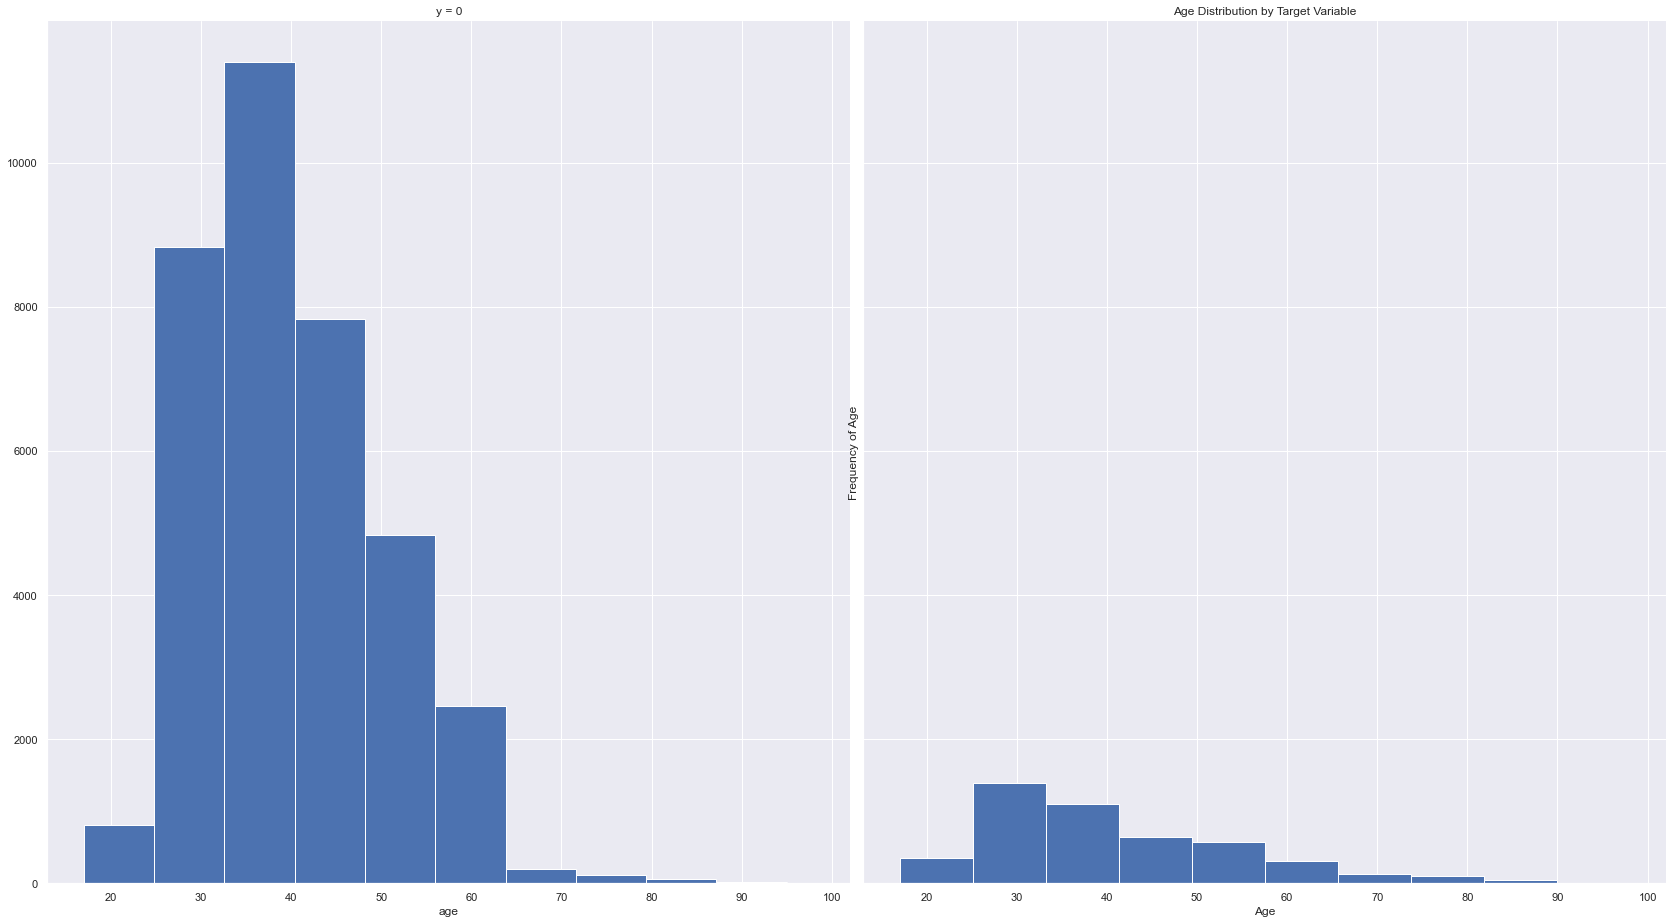

In [308]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(plt.hist, "age")
plt.title('Age Distribution by Target Variable')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')
g.savefig("age_by_class.png")

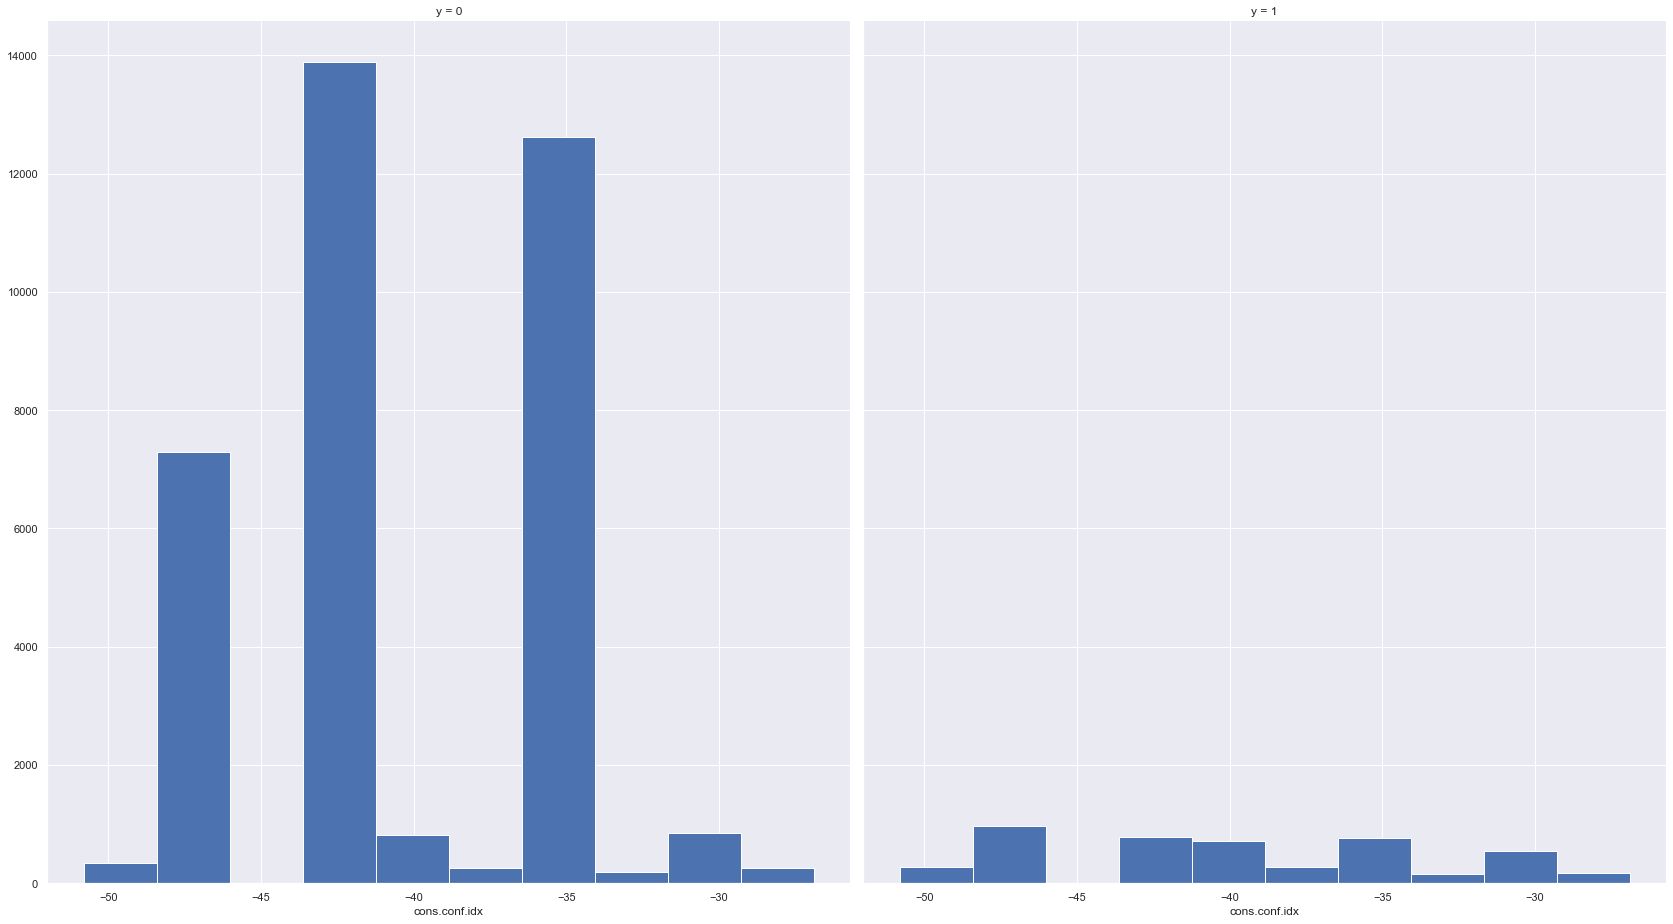

In [186]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(plt.hist, "cons.conf.idx")

In [20]:
print(df[df['y']==1]['cons.price.idx'].mean())
print(df[df['y']==0]['cons.price.idx'].mean())

93.35438599137932
93.6037570592098


In [21]:
print(df[df['y']==1]['euribor3m'].mean())
print(df[df['y']==0]['euribor3m'].mean())

2.1231351293103446
3.8114911623071035


In [237]:
print(df['cons.conf.idx'].value_counts())
print(df['cons.conf.idx'].mean())
print(df['cons.price.idx'].mean())

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64
-40.50260027192386
93.5756643682626


In [22]:
## Null Hypothesis= h0 = h1
## Alt. Hypothesis = h0 > h1
stats.ttest_ind(df[df['y']==0]['euribor3m'], df[df['y']==1]['euribor3m'])

### The euribor 3m rate is the rate banks lend money to each other
### The rate is generally lower than when people subscribe. A lower
### rate my mean that the economy is doing worse and will need to be stimulated

Ttest_indResult(statistic=65.64662251866282, pvalue=0.0)

In [25]:
print(df[df['y']==1]['emp.var.rate'].mean())
print(df[df['y']==0]['emp.var.rate'].mean())

-1.2334482758620686
0.248875451461092


In [26]:
stats.ttest_ind(df[df['y']==0]['emp.var.rate'], df[df['y']==1]['emp.var.rate'])

Ttest_indResult(statistic=63.433665552940745, pvalue=0.0)

In [27]:
print(df[df['y']==0]['cons.conf.idx'].mean())
print(df[df['y']==1]['cons.conf.idx'].mean())

-40.59309674948014
-39.78978448275862


In [28]:
print(df[df['y']==0]['previous'].mean())
print(df[df['y']==1]['previous'].mean())

### This should be turned into a categorical/dummy column

0.13237386450694977
0.49267241379310345


In [148]:
df['cons.conf.idx'].mean()

-40.50260027192386

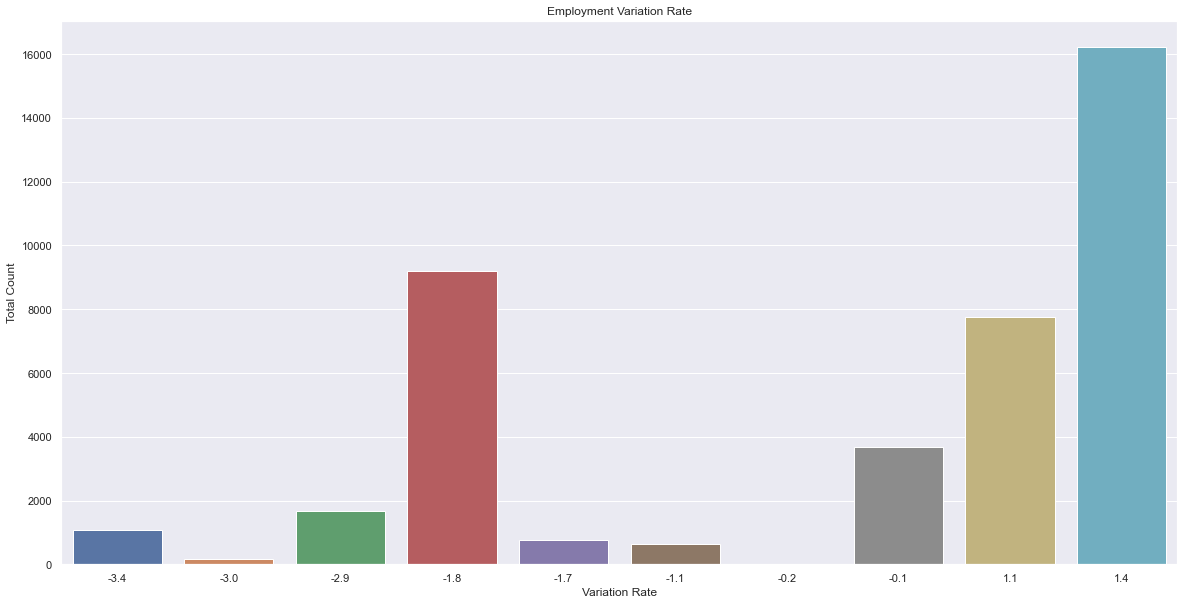

In [304]:
emp_var_rate_chart = sns.countplot(x=df['emp.var.rate'])
plt.title('Employment Variation Rate')
plt.xlabel('Variation Rate')
plt.ylabel('Total Count')
emp_var_rate_chart.figure.savefig("emp_var_rate.png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


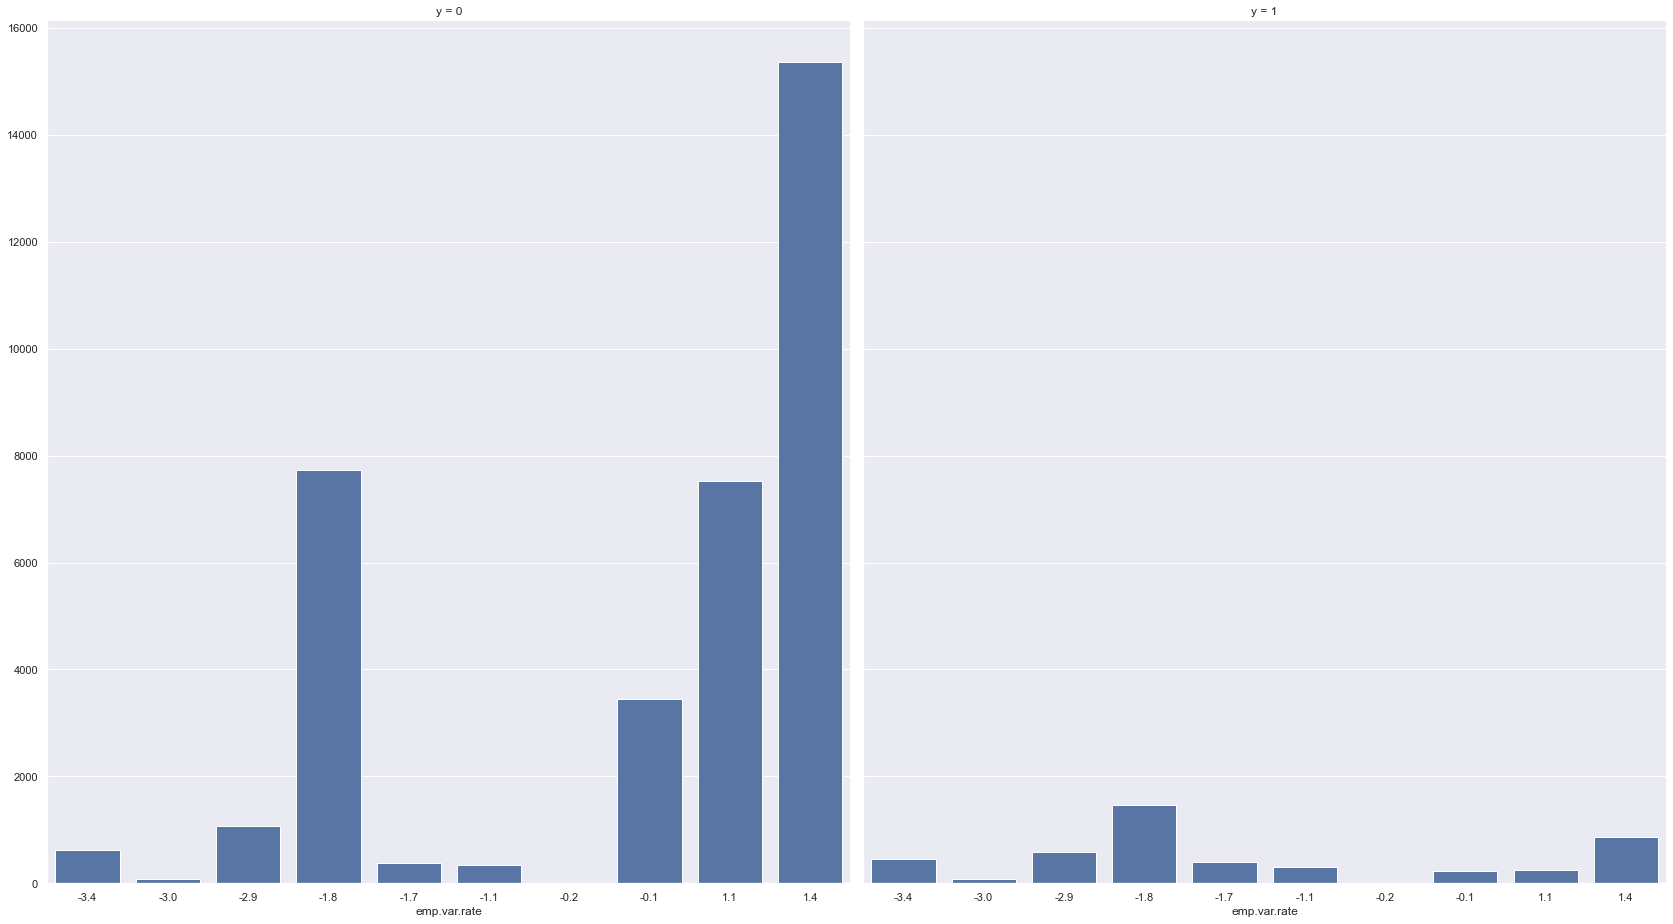

In [306]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "emp.var.rate")
g.savefig("emp_var_rate_by_class.png")

### Feature Engineering

In [33]:
contact_months = df['month'].value_counts()

In [34]:
cat_dummies = pd.get_dummies(df[['job', 'marital','education', 'contact', 'month', 'day_of_week','poutcome', 'housing','loan','previous']], drop_first=True)
df = pd.concat([df, cat_dummies], axis=1)

In [35]:
df.drop(['job', 'marital','education', 'contact', 'month', 'day_of_week','poutcome', 'housing','loan','previous'], axis=1, inplace=True)

In [36]:
euri_threshold = df['euribor3m'].mean() - df['euribor3m'].std()
df['low_euribor3m'] = df['euribor3m'] < euri_threshold

In [37]:
euri_dummies = pd.get_dummies(df[['low_euribor3m']],drop_first=True)
df = pd.concat([df, euri_dummies], axis=1)

In [219]:
df['low_emp_var_rate'] = df['emp.var.rate'] < -1.23 
df['low_emp_var_rate'] = df['low_emp_var_rate'].replace({False:0, True:1})

In [231]:
df['low_cons_conf_idx'] = df['cons.conf.idx'] < -40.6 ## Ppl seem to subscribe more when this is lower
df['low_cons_conf_idx'] = df['low_cons_conf_idx'].replace({False:0,True:1}).astype(int)

In [52]:
## These features were created after first logistic Regression Test.

df['high_cons.price.idx'] = df['cons.price.idx'] > 93.75
df['high_cons.price.idx'] = df['high_cons.price.idx'].replace({False:0,True:1})
df['high_cons.price.idx'] = df['high_cons.price.idx'].astype(int)
df['low_euribor3m'] = df['low_euribor3m'].astype(int)
df['senior_citizen'] = df['age'] > 65 ### Portuguese Senior Citizen Age
df['senior_citizen'] = df['senior_citizen'].replace({False:0,True:1})

### Modeling

In [38]:
X = df.drop('y',axis=1)
y = df['y']

###### KNN

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# KNN Test

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('Recall: ' + str(metrics.precision_score(y_test, y_pred_class)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy: 0.8948237350684666
Recall: 0.6040609137055838
F1 Score: 0.3053239255933291


In [41]:
cm = confusion_matrix(y_test,y_pred_class)
cm

array([[8976,  156],
       [ 927,  238]])

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[8976  156]
 [ 927  238]]


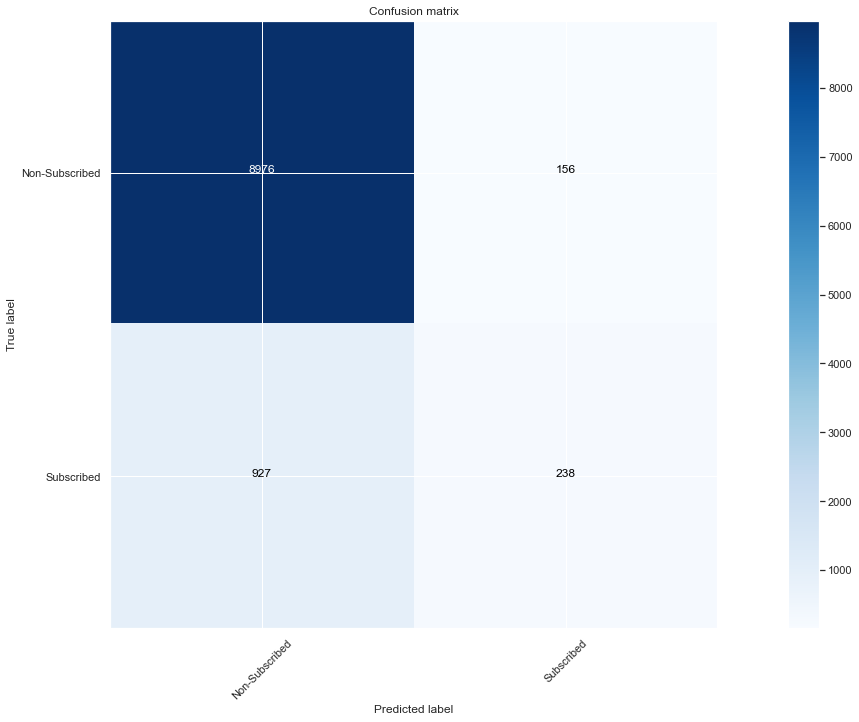

In [44]:
classes=['Non-Subscribed','Subscribed']
plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)

###### Logistic Regression

In [45]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, random_state=2)

In [46]:
### May need to tweek the features on this model to get a better fit.
### Possibly create lr dataset

log_reg = LogisticRegression()
log_reg.fit(X_train_lr, y_train_lr)
y_pred_class = log_reg.predict(X_test_lr)
print('Accuracy: ' + str(metrics.accuracy_score(y_test_lr, y_pred_class)))
print('Recall: ' + str(metrics.precision_score(y_test_lr, y_pred_class)))
print('F1 Score: ' + str(metrics.f1_score(y_test_lr, y_pred_class)))

Accuracy: 0.893949694085656
Recall: 0.5768261964735516
F1 Score: 0.2954838709677419


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
col_names = X.columns

In [48]:
lr_coefficients = dict(zip(col_names,log_reg.coef_[0]))

In [49]:
lr_coefficients

{'age': 0.0026786699554644518,
 'campaign': -0.09584806943607961,
 'cons.conf.idx': 0.030222465419317085,
 'cons.price.idx': 0.44913775047676296,
 'contact_telephone': -0.1780424142454474,
 'day_of_week_mon': -0.07143670614329603,
 'day_of_week_thu': 0.03520719191529417,
 'day_of_week_tue': 0.021189645277185244,
 'day_of_week_wed': 0.04233923546673751,
 'default': 0.1018578737595532,
 'education_6Y': -0.018963257672945526,
 'education_9Y': -0.06779823189514617,
 'education_high school': -0.012128437808484225,
 'education_illiterate': 0.002024610593325048,
 'education_professional course': 0.01557827277513993,
 'education_university degree': 0.08904703546238316,
 'education_unknown': 0.014644746164615724,
 'emp.var.rate': -0.06416982963854437,
 'euribor3m': -0.12547530751425484,
 'housing_1': 0.0026567524174970405,
 'housing_unknown': -0.00554911444780399,
 'job_blue-collar': -0.09733827186081784,
 'job_entrepreneur': -0.009107535308324782,
 'job_housemaid': -0.001912238724374689,
 'job

###### The listed coefficients will caused me to seach out more detalis in the data.
###### See if I can find better relationships in the data.

###### More Logistic Regression - (Tweaking Parameters)

In [54]:
X = df.drop('y',axis=1)
y = df['y']

In [55]:
X_train_lreg, X_test_lreg, y_train_lreg, y_test_lreg = train_test_split(X, y, random_state=3)

<p> In this loop, I will be using L1 penalty and I will try multiple values for C. Also, I will be balancing the class
    weights in order to account for the large class imbalance. I will also be setting the max iterations to 500
<p>

In [94]:
log_reg_results = []
c_vals = [1.0,.90,.75,.50,.25]
for i in range(5):
    ans = {}
    log_reg = LogisticRegression(penalty='l2', class_weight='balanced', C=c_vals[i], max_iter=500)
    log_reg.fit(X_train_lreg, y_train_lreg)
    y_pred_class = log_reg.predict(X_test_lreg)
    ans['Test #'] = i
    ans['C'] = c_vals[i]
    ans['Accuracy'] = str(round(metrics.accuracy_score(y_test_lreg, y_pred_class),4))
    ans['Recall'] = str(round(metrics.precision_score(y_test_lreg, y_pred_class),4))
    ans['F1 Score'] = str(round(metrics.f1_score(y_test_lreg, y_pred_class),4))
    log_reg_results.append(ans)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [96]:
log_reg_results_df = pd.DataFrame(log_reg_results)
log_reg_results_df.head(5)

Accuracy     C F1 Score  Recall  Test #
0   0.8138  1.00   0.4363  0.3333       0
1   0.8189  0.90   0.4441  0.3417       1
2   0.8118  0.75   0.4347  0.3307       2
3   0.8126  0.50   0.4353  0.3317       3
4   0.8246  0.25    0.448  0.3495       4

In [97]:
log_reg_results_df = log_reg_results_df.sort_values(by='C')

In [98]:
log_reg_results_df['F1 Score'] = [float(i) for i in log_reg_results_df['F1 Score']]

[Text(0, 0.5, 'F1 Score'), Text(0.5, 0, 'C Value')]

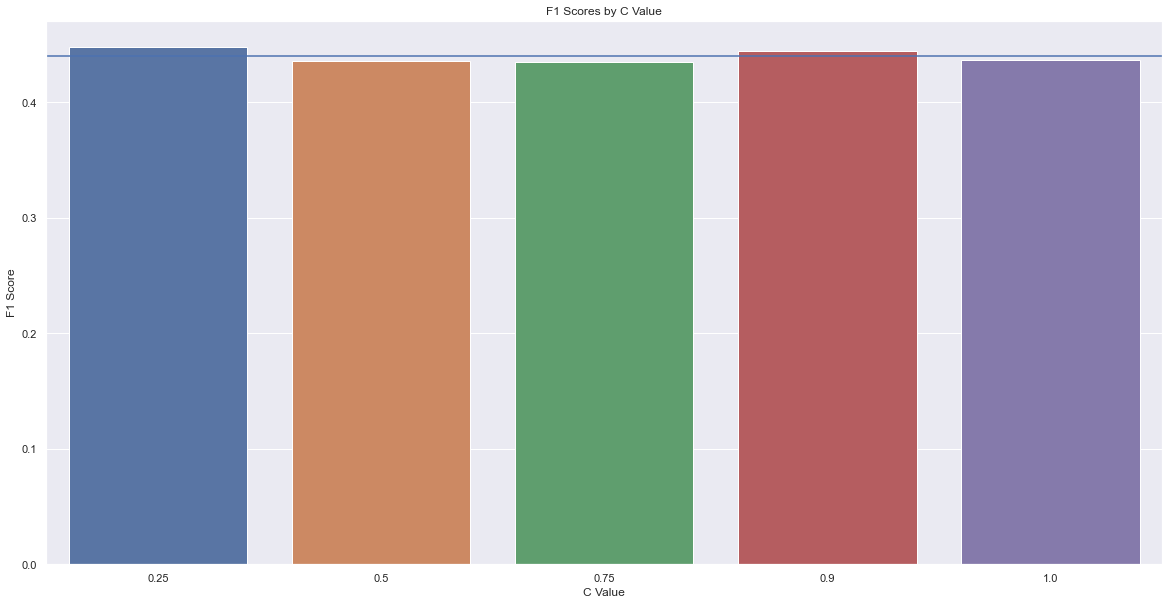

In [99]:
fig, ax = plt.subplots(sharex=True)
f1_mean = log_reg_results_df['F1 Score'].mean()
plt.axhline(f1_mean)
log_reg_chart = sns.barplot(x='C',y='F1 Score', data=log_reg_results_df)
log_reg_chart.set_title('F1 Scores by C Value')
log_reg_chart.set(xlabel='C Value', ylabel='F1 Score')

### Decision Tree

<p> First, I will run a Decision Tree with no hyperparameter tuning to see how well the model performs. <p>

In [112]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, random_state=5)

In [113]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, random_state=5)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_dt,y_train_dt)
y_pred_train = dtc.predict(X_train_dt)
y_pred_test = dtc.predict(X_test_dt)
print("F1 Score: ", metrics.f1_score(y_test_dt, y_pred_test))
print("Precision: ", metrics.precision_score(y_test_dt, y_pred_test))
print("Accuracy:", metrics.accuracy_score(y_test_dt, y_pred_test))


F1 Score:  0.3281505728314239
Precision:  0.3281505728314239
Accuracy: 0.8405360784694571


In [110]:
dot_data = StringIO()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.188501 to fit



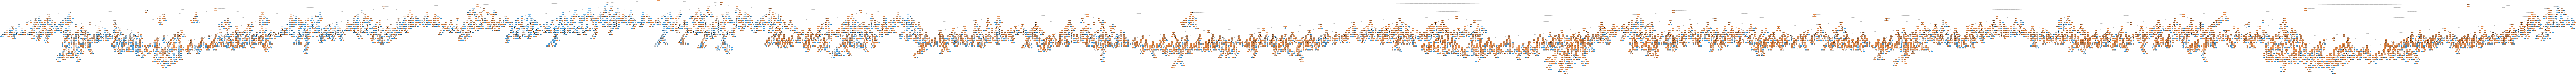

In [111]:
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<p> The untuned DTC has both a low F1 Score, as well as a low precision score. This means, it got a lot of false positives.<p>

### Decision Tree - (Tuned)

In [114]:
X_train_dtt, X_test_dtt, y_train_dtt, y_test_dtt = train_test_split(X, y, random_state=5)

In [123]:
dtc2 =  DecisionTreeClassifier( class_weight='balanced',criterion='entropy')
criterion = ['entropy', 'gini']
depths = [7,8,9,10]
max_feats = ['auto','sqrt','log2']
params = dict(criterion=criterion, max_depth=depths, max_features=max_feats)

In [120]:
rand = RandomizedSearchCV(dtc2, params, cv=10, scoring='f1', n_iter=10, random_state=5, return_train_score=False)

In [121]:
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
   

In [122]:
print(rand.best_score_)
print(rand.best_params_)

0.11890275891209715
{'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}


<p> Based on the F1 Score above, the DTC that uses Grid Search will have to be improved<p>

###### Decision Tree - GridSearch CV - Continued

In [144]:
dtc3 = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features='sqrt')
depths = list(range(1,12))
mss = list(range(2,10))
splits = ['best','random']
params = dict(max_depth=depths, splitter=splits, min_samples_split=mss, min_samples_leaf=mss)
rand2 = RandomizedSearchCV(dtc2, params, cv=15, scoring='f1', n_iter=10, random_state=8, return_train_score=False)
rand2.fit(X,y)

RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,


In [145]:
print(rand2.best_score_)
print(rand2.best_params_)

0.3339253263680071
{'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 2}


### Random Forest

In [174]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, random_state=5)
rfc = RandomForestClassifier(random_state = 1, n_estimators=1000, max_depth=15, max_features=15, class_weight='balanced')
rfc.fit(X_train_rf,y_train_rf)
rfc_pred = rfc.predict(X_test_rf)
rfc_f1 = metrics.f1_score(y_test_rf, rfc_pred)
print('F1 Score: ', rfc_f1)

F1 Score:  0.4893790849673203


In [176]:
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X, y, random_state=5)
rfc = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=12, max_features=15, class_weight='balanced')
rfc.fit(X_train_rf2,y_train_rf2)
rfc_pred = rfc.predict(X_test_rf2)
rfc_f1 = metrics.f1_score(y_test_rf2, rfc_pred)
print('F1 Score: ', rfc_f1)

F1 Score:  0.5036603221083455


In [178]:
X_train_rf3, X_test_rf3, y_train_rf3, y_test_rf3 = train_test_split(X, y, random_state=5)
rfc = RandomForestClassifier(random_state = 1, n_estimators=4000, max_depth=10, max_features=17, class_weight='balanced')
rfc.fit(X_train_rf3,y_train_rf3)
rfc_pred = rfc.predict(X_test_rf3)
rfc_f1 = metrics.f1_score(y_test_rf3, rfc_pred)
print('F1 Score: ', rfc_f1)

F1 Score:  0.504002784545771


In [181]:
X_train_rf4, X_test_rf4, y_train_rf4, y_test_rf4 = train_test_split(X, y, random_state=5)
rfc = RandomForestClassifier(random_state = 1, n_estimators=3000, max_depth=12, max_features=15, class_weight='balanced')
rfc.fit(X_train_rf4,y_train_rf4)
rfc_pred = rfc.predict(X_test_rf4)
rfc_f1 = metrics.f1_score(y_test_rf4, rfc_pred)
print('F1 Score: ', rfc_f1)

F1 Score:  0.5021929824561404


In [193]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 7 (0.178545)
2. feature 8 (0.161748)
3. feature 4 (0.083203)
4. feature 0 (0.074169)
5. feature 50 (0.044633)
6. feature 51 (0.043382)
7. feature 6 (0.043301)
8. feature 2 (0.042232)
9. feature 45 (0.027103)
10. feature 5 (0.023542)
11. feature 36 (0.021563)
12. feature 30 (0.016352)
13. feature 1 (0.014173)
14. feature 46 (0.012541)
15. feature 38 (0.012155)
16. feature 3 (0.010406)
17. feature 40 (0.010369)
18. feature 48 (0.009720)
19. feature 20 (0.009658)
20. feature 21 (0.008855)
21. feature 9 (0.008822)
22. feature 28 (0.008733)
23. feature 25 (0.008708)
24. feature 43 (0.008587)
25. feature 42 (0.008513)
26. feature 44 (0.008505)
27. feature 41 (0.008236)
28. feature 24 (0.008078)
29. feature 17 (0.007177)
30. feature 15 (0.006914)
31. feature 27 (0.006349)
32. feature 13 (0.005684)
33. feature 12 (0.005534)
34. feature 23 (0.005232)
35. feature 10 (0.004793)
36. feature 14 (0.004551)
37. feature 29 (0.004344)
38. feature 16 (0.003927)
39. feature 11

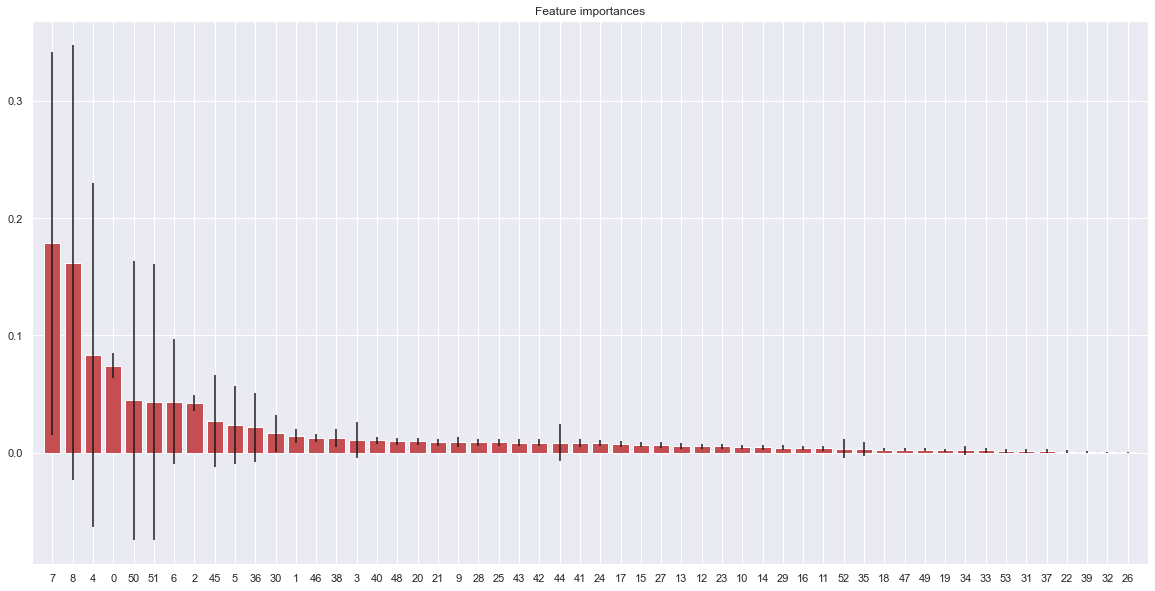

In [194]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [252]:
for i in range(len(X.columns)): 
    print (i, end = " ") 
    print (X.columns[i])

0 age
1 default
2 campaign
3 previous
4 emp.var.rate
5 cons.price.idx
6 cons.conf.idx
7 euribor3m
8 nr.employed
9 job_blue-collar
10 job_entrepreneur
11 job_housemaid
12 job_management
13 job_retired
14 job_self-employed
15 job_services
16 job_student
17 job_technician
18 job_unemployed
19 job_unknown
20 marital_married
21 marital_single
22 marital_unknown
23 education_6Y
24 education_9Y
25 education_high school
26 education_illiterate
27 education_professional course
28 education_university degree
29 education_unknown
30 contact_telephone
31 month_aug
32 month_dec
33 month_jul
34 month_jun
35 month_mar
36 month_may
37 month_nov
38 month_oct
39 month_sep
40 day_of_week_mon
41 day_of_week_thu
42 day_of_week_tue
43 day_of_week_wed
44 poutcome_nonexistent
45 poutcome_success
46 housing_1
47 housing_unknown
48 loan_1
49 loan_unknown
50 low_euribor3m
51 low_euribor3m
52 high_cons.price.idx
53 senior_citizen


### Voting Classifier

<p> I'm running a voting classifier since I always get a slight F1 Score boost from it.

In [289]:
X = df.drop(['y','low_euribor3m'],axis=1)
y = df['y']

In [291]:
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(X, y, random_state=1)

lr_1 = LogisticRegression(penalty='l2', class_weight='balanced', C= 1.0, max_iter=500)
lr_2 = LogisticRegression(penalty='l2', class_weight='balanced', C =.90, max_iter=500)
lr_3 = LogisticRegression(penalty='l2', class_weight='balanced', C =.85, max_iter=500)
lr_4 = LogisticRegression(penalty='l2', class_weight='balanced', C =.80, max_iter=500)
lr_5 = LogisticRegression(penalty='l2', class_weight='balanced', C =.75, max_iter=500)
rfc_1 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=12, max_features=15, class_weight='balanced')
rfc_2 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=13, max_features=15, class_weight='balanced')
rfc_3 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=14, max_features=15, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('logreg1', lr_1),('logreg2', lr_2),('logreg3', lr_3),('logreg4', lr_4),('logreg5', lr_5),('rf1', rfc_1),('rf2', rfc_2),('rf3', rfc_3)],voting='hard')

voting_clf.fit(X_train_vc, y_train_vc)
vc_preds = voting_clf.predict(X_test_vc)
vc_f1 = metrics.f1_score(y_test, vc_preds)
print('F1 Score: ',vc_f1)

F1 Score:  0.4600760456273765


### XGBoost

In [294]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, random_state=10)
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 7, 
                           alpha = 1, 
                           n_estimators = 1000)

xg_clf.fit(X_train_xg,y_train_xg)
preds = xg_clf.predict(X_test_xg)
test_f1 = metrics.f1_score(y_test_xg, preds)
test_acc = metrics.accuracy_score(y_test_xg, preds)
print("Accuracy: ", test_acc)
print("F1: ",  test_f1)

Accuracy:  0.8887054481887928
F1:  0.35977653631284917


In [295]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, random_state=10)
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.4,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 1000)

xg_clf.fit(X_train_xg,y_train_xg)
preds = xg_clf.predict(X_test_xg)
test_f1 = metrics.f1_score(y_test_xg, preds)
test_acc = metrics.accuracy_score(y_test_xg, preds)
print("Accuracy: ", test_acc)
print("F1: ",  test_f1)

Accuracy:  0.8888025638535496
F1:  0.36069235064209937


### Running Models off of Truncated Data

In [254]:
X_mod = df.drop(['education_illiterate', 'month_dec', 'month_sep','marital_unknown','month_nov','month_aug','senior_citizen','month_jul','month_jun','job_unknown',
               'loan_unknown','housing_unknown','month_mar','job_unemployed','high_cons.price.idx','job_housemaid','job_student','education_unknown', 'job_self-employed',
               'job_entrepreneur','education_6Y','job_management','job_retired','education_professional course','job_services','y'], axis=1)
y = df['y']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, random_state=1)

In [260]:
knn_results_mod_data = []
for i in range(1,20):
    knn_truncated_results = {}
    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)

    y_pred_class = knn.predict(X_test)
    knn_truncated_results['test'] = i
    knn_truncated_results['accuracy'] = (metrics.accuracy_score(y_test, y_pred_class))
    knn_truncated_results['recall'] = (metrics.precision_score(y_test, y_pred_class))
    knn_truncated_results['f1_score'] = (metrics.f1_score(y_test, y_pred_class))
    knn_truncated_results['confusion_matrix'] = confusion_matrix(y_test,y_pred_class)
    knn_results_mod_data.append(knn_truncated_results)

In [262]:
pd.DataFrame(knn_results_mod_data)

accuracy           confusion_matrix  f1_score    recall  test
0   0.852773  [[8390, 742], [774, 391]]  0.340296  0.345102     1
1   0.892007  [[8966, 166], [946, 219]]  0.282581  0.568831     2
2   0.885404  [[8776, 356], [824, 341]]  0.366273  0.489240     3
3   0.892590  [[8959, 173], [933, 232]]  0.295541  0.572840     4
4   0.891133  [[8864, 268], [853, 312]]  0.357593  0.537931     5
5   0.894241  [[8958, 174], [915, 250]]  0.314663  0.589623     6
6   0.894435  [[8889, 243], [844, 321]]  0.371313  0.569149     7
7   0.896183  [[8974, 158], [911, 254]]  0.322131  0.616505     8
8   0.896183  [[8919, 213], [856, 309]]  0.366331  0.591954     9
9   0.897640  [[8980, 152], [902, 263]]  0.332911  0.633735    10
10  0.897543  [[8940, 192], [863, 302]]  0.364075  0.611336    11
11  0.897543  [[8980, 152], [903, 262]]  0.331856  0.632850    12
12  0.898029  [[8955, 177], [873, 292]]  0.357405  0.622601    13
13  0.897640  [[8986, 146], [908, 257]]  0.327806  0.637717    14
14  0.897252  [[8954, 178], [880, 285]]  0.350123  0.615551    15
15  0.898708  [[8991, 141], [902, 263]]  0.335245  0.650990    16
16  0.899291  [[8968, 164], [873, 292]]  0.360271  0.640351    17
17  0.899000  [[8996, 136], [904, 261]]  0.334187  0.657431    18
18  0.898903  [[8970, 162], [879, 286]]  0.354619  0.638393    19

### Decision Tree Classifier - Smaller Dataset

In [265]:
dtc_results_td = []
for i in range(1,26):
    ans = {}
    dtc = DecisionTreeClassifier(class_weight='balanced', max_features=i)
    dtc = dtc.fit(X_train_dt,y_train_dt)
    y_pred_train = dtc.predict(X_train_dt)
    y_pred_test = dtc.predict(X_test_dt)
    ans['test'] = i
    ans['F1 Score'] = metrics.f1_score(y_test_dt, y_pred_test)
    ans['Precision'] = metrics.precision_score(y_test_dt, y_pred_test)
    ans['Accuracy'] = metrics.accuracy_score(y_test_dt, y_pred_test)
    dtc_results_td.append(ans)

In [267]:
pd.DataFrame(dtc_results_td)

Accuracy  F1 Score  Precision  test
0   0.840925  0.319767   0.324621     1
1   0.842090  0.309847   0.321869     2
2   0.841119  0.308538   0.319056     3
3   0.845586  0.329114   0.339721     4
4   0.845780  0.314335   0.332724     5
5   0.843741  0.312099   0.326768     6
6   0.843547  0.323961   0.332472     7
7   0.840925  0.318068   0.323729     8
8   0.842576  0.327107   0.331929     9
9   0.842381  0.318354   0.327006    10
10  0.846654  0.335717   0.345455    11
11  0.841993  0.316674   0.325280    12
12  0.843255  0.313191   0.326241    13
13  0.845683  0.329819   0.340296    14
14  0.844809  0.327441   0.337088    15
15  0.839565  0.310518   0.316865    16
16  0.841410  0.315878   0.323605    17
17  0.840730  0.312081   0.320138    18
18  0.842187  0.322634   0.328802    19
19  0.843741  0.327622   0.334757    20
20  0.845683  0.320068   0.335426    21
21  0.847917  0.330197   0.345878    22
22  0.843741  0.334299   0.338075    23
23  0.847431  0.339639   0.349179    24
24  0.845586  0.333054   0.341652    25

In [269]:
dtc_results_td_2 = []
for i in range(20,26):
    ans = {}
    dtc = DecisionTreeClassifier(class_weight='balanced', max_features=i)
    dtc = dtc.fit(X_train_dt,y_train_dt)
    y_pred_train = dtc.predict(X_train_dt)
    y_pred_test = dtc.predict(X_test_dt)
    ans['test'] = i
    ans['F1 Score'] = metrics.f1_score(y_test_dt, y_pred_test)
    ans['Precision'] = metrics.precision_score(y_test_dt, y_pred_test)
    ans['Accuracy'] = metrics.accuracy_score(y_test_dt, y_pred_test)
    dtc_results_td_2.append(ans)

In [270]:
pd.DataFrame(dtc_results_td_2)

Accuracy  F1 Score  Precision  test
0  0.842478  0.315034   0.325480    20
1  0.839274  0.317526   0.320033    21
2  0.846169  0.333333   0.343154    22
3  0.846557  0.348185   0.351082    23
4  0.837331  0.323779   0.319522    24
5  0.842576  0.332097   0.334440    25

In [280]:
X_train_vc_td, X_test_vc_td, y_train_vc_td, y_test_vc_td = train_test_split(X_mod, y, random_state=1)

lr_1 = LogisticRegression(penalty='l2', class_weight='balanced', C = 1.0, max_iter=500)
lr_2 = LogisticRegression(penalty='l2', class_weight='balanced', C =.90, max_iter=500)
lr_3 = LogisticRegression(penalty='l2', class_weight='balanced', C =.85, max_iter=500)
lr_4 = LogisticRegression(penalty='l2', class_weight='balanced', C =.80, max_iter=500)
lr_5 = LogisticRegression(penalty='l2', class_weight='balanced', C =.75, max_iter=500)
rfc_1 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=12, max_features=15, class_weight='balanced')
rfc_2 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=13, max_features=15, class_weight='balanced')
rfc_3 = RandomForestClassifier(random_state = 1, n_estimators=2000, max_depth=14, max_features=15, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('logreg1', lr_1),('logreg2', lr_2),('logreg3', lr_3),('logreg4', lr_4),('logreg5', lr_5),('rf1', rfc_1),('rf2', rfc_2),('rf3', rfc_3)],voting='hard')

voting_clf.fit(X_train_vc_td, y_train_vc_td)
vc_preds = voting_clf.predict(X_test_vc_td)
vc_f1 = metrics.f1_score(y_test_vc_td, vc_preds)
print('F1 Score: ',vc_f1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 Score:  0.4600559527510102


In [ ]:
set(df[''])